<a href="https://colab.research.google.com/github/lgavmarin/DataViz/blob/master/ex2_seaborn_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from vega_datasets import data
unemp_data = data.unemployment_across_industries()
un=unemp_data
un.head()


,count,date,month,rate,series,year
0,430,2000-01-01 08:00:00,1,2.1,Government,2000
1,409,2000-02-01 08:00:00,2,2.0,Government,2000
2,311,2000-03-01 08:00:00,3,1.5,Government,2000
3,269,2000-04-01 08:00:00,4,1.3,Government,2000
4,370,2000-05-01 07:00:00,5,1.9,Government,2000


In [0]:
un.series.unique()

array(['Government', 'Mining and Extraction', 'Construction',
       'Manufacturing', 'Wholesale and Retail Trade',
       'Transportation and Utilities', 'Information', 'Finance',
       'Business services', 'Education and Health',
       'Leisure and hospitality', 'Other', 'Agriculture', 'Self-employed'],
      dtype=object)

In [0]:
un.series.value_counts()
un.shape

(1708, 6)

<function matplotlib.pyplot.show>

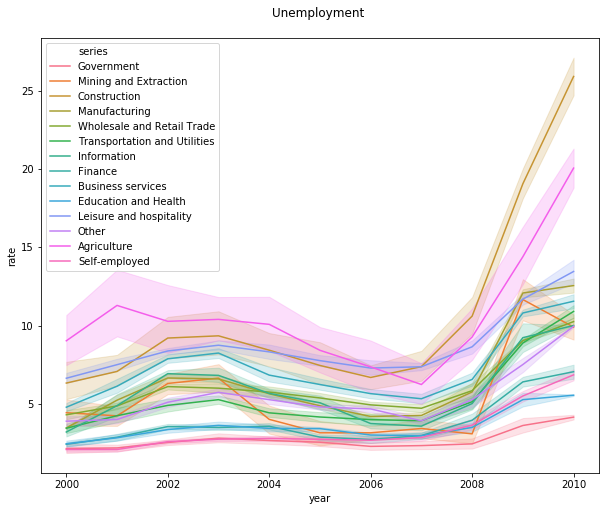

In [0]:
plt.figure(figsize=(10,8))
sns.lineplot(data=un, x='year', y='rate', hue='series')
plt.title('Unemployment \n')
plt.show

<function matplotlib.pyplot.show>

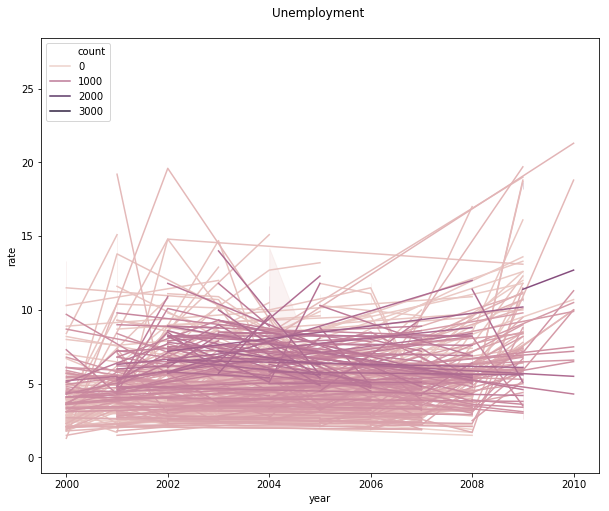

In [0]:
plt.figure(figsize=(10,8))
sns.lineplot(data=un, x='year', y='rate', hue='count')
plt.title('Unemployment \n')
plt.show

In [0]:
#unemp_data.date.unique()
un.date.value_counts()

2001-11-01 08:00:00    14
2007-03-01 08:00:00    14
2005-01-01 08:00:00    14
2000-08-01 07:00:00    14
2003-05-01 07:00:00    14
2002-03-01 08:00:00    14
2005-04-01 08:00:00    14
2009-06-01 07:00:00    14
2005-11-01 08:00:00    14
2001-06-01 07:00:00    14
2000-04-01 08:00:00    14
2007-04-01 07:00:00    14
2000-11-01 08:00:00    14
2007-11-01 07:00:00    14
2008-02-01 08:00:00    14
2003-09-01 07:00:00    14
2006-06-01 07:00:00    14
2009-07-01 07:00:00    14
2000-01-01 08:00:00    14
2003-02-01 08:00:00    14
2008-12-01 08:00:00    14
2004-07-01 07:00:00    14
2009-03-01 08:00:00    14
2005-05-01 07:00:00    14
2008-06-01 07:00:00    14
2004-03-01 08:00:00    14
2000-05-01 07:00:00    14
2009-04-01 07:00:00    14
2006-10-01 07:00:00    14
2001-12-01 08:00:00    14
                       ..
2003-10-01 07:00:00    14
2000-06-01 07:00:00    14
2006-07-01 07:00:00    14
2003-12-01 08:00:00    14
2007-01-01 08:00:00    14
2010-02-01 08:00:00    14
2002-08-01 07:00:00    14
2005-09-01 0

So now I would like to learn if there is a correlation between month and rate. IS there a  month that is worst for unemployment?MONTH AND YEAR are already columns.


In [0]:
#unemp_data['year'] = pd.DatetimeIndex(unemp_data['date']).year
un['day'] = pd.DatetimeIndex(un['date']).day
un['hour'] = pd.DatetimeIndex(un['date']).hour
un.head()

,count,date,month,rate,series,year,day,hour
0,430,2000-01-01 08:00:00,1,2.1,Government,2000,1,8
1,409,2000-02-01 08:00:00,2,2.0,Government,2000,1,8
2,311,2000-03-01 08:00:00,3,1.5,Government,2000,1,8
3,269,2000-04-01 08:00:00,4,1.3,Government,2000,1,8
4,370,2000-05-01 07:00:00,5,1.9,Government,2000,1,7


<function matplotlib.pyplot.show>

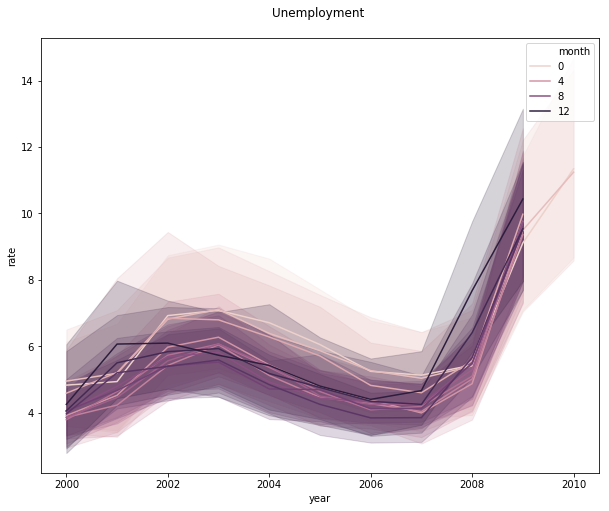

In [0]:
plt.figure(figsize=(10,8))
sns.lineplot(data=un, x='year', y='rate', hue='month') 
plt.title('Unemployment \n')
plt.show

Examining dataset, # entries, min max, sort https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html


In [0]:
un['series'].count()
un['rate'].count()
un['rate'].max() #27.1
#un['rate'].min() #0.3
un.sort_values(by=['rate', 'month'])

,count,date,month,rate,series,year,day,hour
191,2,2005-10-01 07:00:00,10,0.3,Mining and Extraction,2005,1,7
3,269,2000-04-01 08:00:00,4,1.3,Government,2000,1,8
215,9,2007-10-01 07:00:00,10,1.3,Mining and Extraction,2007,1,7
13,298,2001-02-01 08:00:00,2,1.5,Government,2001,1,8
2,311,2000-03-01 08:00:00,3,1.5,Government,2000,1,8
224,13,2008-07-01 07:00:00,7,1.5,Mining and Extraction,2008,1,7
178,8,2004-09-01 07:00:00,9,1.5,Mining and Extraction,2004,1,7
97,372,2008-02-01 08:00:00,2,1.7,Government,2008,1,8
1600,181,2001-03-01 08:00:00,3,1.7,Self-employed,2001,1,8
99,373,2008-04-01 07:00:00,4,1.7,Government,2008,1,7


In [0]:
un.index

RangeIndex(start=0, stop=1708, step=1)

In [0]:
#un.month.unique()
#un.year.unique()
#un.year.unique()
un.year.value_counts()


2009    168
2008    168
2007    168
2006    168
2005    168
2004    168
2003    168
2002    168
2001    168
2000    168
2010     28
Name: year, dtype: int64

<function matplotlib.pyplot.show>

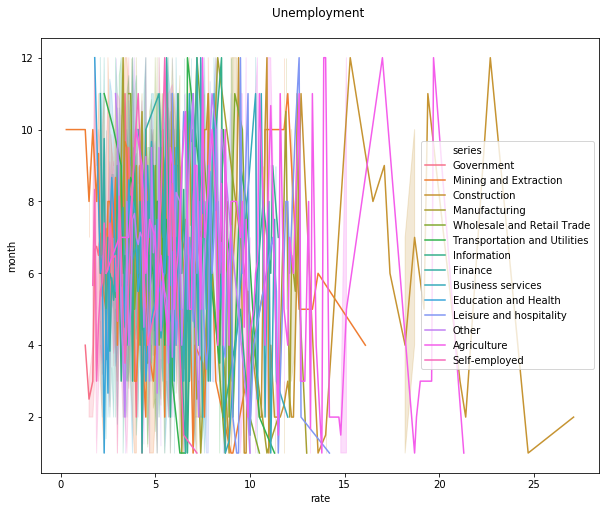

In [0]:
plt.figure(figsize=(10,8))
sns.lineplot(data=un, x='rate', y='month', hue='series')
plt.title('Unemployment \n')
plt.show

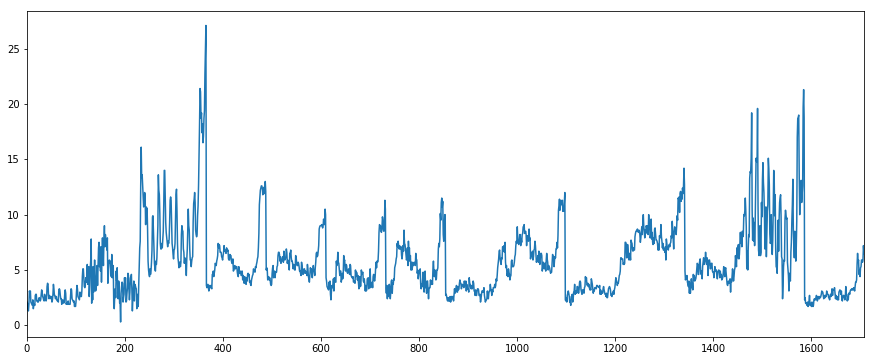

In [0]:
#unemp_data['hour'] = pd.DatetimeIndex(unemp_data['date']).hour
#un.resample("M", how='sum')
#g = un['date'].groupby(pd.Grouper(freq="M"))
#y = un['date'].resample('M').mean()
#un.rate.unique() #value_counts()

y=un.sort_values(by=['date'])
#y.date.unique()
#un.date.unique()
#y['rate'].plot(figsize=(15, 6))
un['rate'].plot(figsize=(15,6))
#plt.show()

https://geo-python.github.io/2017/lessons/L7/pandas-plotting.html

Time series analysis and forecasting with Python:
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://janakiev.com/blog/pandas-groupby/


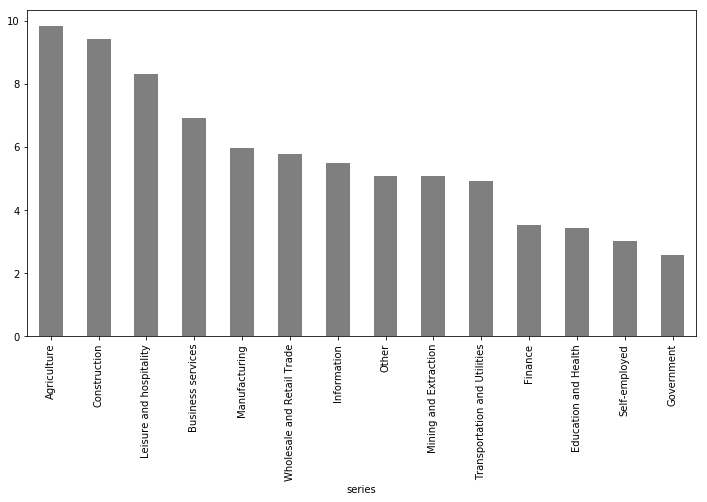

In [0]:
#s1=un.groupby('Government')['series'].mean()  # didnt work
#grouped = un.groupby(['date', 'series'])
#grouped.head(10)

#grouped = un.groupby(['date', 'series'])
#grouped.get_group(('2002', 'Government')) # make sure it's a tuple

#example:
#group = df.groupby('Department')
#average_salary = group['Annual Salary'].mean().sort_values(ascending=False)

group = un.groupby('series')
average_rate = group['rate'].mean().sort_values(ascending=False)
average_rate.plot(kind='bar', figsize=(12, 6), color='k', alpha=0.5);




**Now that I know how to group data, try to get a single Series (Agriculture for example) to look at its time-variability**


https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html 


In [0]:
#g = x.groupby('Color')
#g.groups.keys()

g = un.groupby('series')
g.groups.keys()
list(g.groups) 

#g1=g.get_group('Government') 
g1=g.get_group('Agriculture') 
g1.head(10)

,count,date,month,rate,series,year,day,hour
1464,154,2000-01-01 08:00:00,1,10.3,Agriculture,2000,1,8
1465,173,2000-02-01 08:00:00,2,11.5,Agriculture,2000,1,8
1466,152,2000-03-01 08:00:00,3,10.4,Agriculture,2000,1,8
1467,135,2000-04-01 08:00:00,4,8.9,Agriculture,2000,1,8
1468,73,2000-05-01 07:00:00,5,5.1,Agriculture,2000,1,7
1469,109,2000-06-01 07:00:00,6,6.7,Agriculture,2000,1,7
1470,77,2000-07-01 07:00:00,7,5.0,Agriculture,2000,1,7
1471,110,2000-08-01 07:00:00,8,7.0,Agriculture,2000,1,7
1472,124,2000-09-01 07:00:00,9,8.2,Agriculture,2000,1,7
1473,113,2000-10-01 07:00:00,10,8.0,Agriculture,2000,1,7


https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000


In [0]:
from datetime import datetime
con=g1['date']
g1['date']=pd.to_datetime(g1['date'])
g1.set_index('date', inplace=True)
#check datatype of index
g1.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


DatetimeIndex(['2000-01-01 08:00:00', '2000-02-01 08:00:00',
               '2000-03-01 08:00:00', '2000-04-01 08:00:00',
               '2000-05-01 07:00:00', '2000-06-01 07:00:00',
               '2000-07-01 07:00:00', '2000-08-01 07:00:00',
               '2000-09-01 07:00:00', '2000-10-01 07:00:00',
               ...
               '2009-05-01 07:00:00', '2009-06-01 07:00:00',
               '2009-07-01 07:00:00', '2009-08-01 07:00:00',
               '2009-09-01 07:00:00', '2009-10-01 07:00:00',
               '2009-11-01 07:00:00', '2009-12-01 08:00:00',
               '2010-01-01 08:00:00', '2010-02-01 08:00:00'],
              dtype='datetime64[ns]', name='date', length=122, freq=None)

In [0]:
#convert to time series:
ts = g1['rate']
ts.head(1000)

date
2000-01-01 08:00:00    10.3
2000-02-01 08:00:00    11.5
2000-03-01 08:00:00    10.4
2000-04-01 08:00:00     8.9
2000-05-01 07:00:00     5.1
2000-06-01 07:00:00     6.7
2000-07-01 07:00:00     5.0
2000-08-01 07:00:00     7.0
2000-09-01 07:00:00     8.2
2000-10-01 07:00:00     8.0
2000-11-01 08:00:00    13.3
2000-12-01 08:00:00    13.9
2001-01-01 08:00:00    13.8
2001-02-01 08:00:00    15.1
2001-03-01 08:00:00    19.2
2001-04-01 08:00:00    10.4
2001-05-01 07:00:00     7.7
2001-06-01 07:00:00     9.7
2001-07-01 07:00:00     7.6
2001-08-01 07:00:00     9.3
2001-09-01 07:00:00     7.2
2001-10-01 07:00:00     8.7
2001-11-01 08:00:00    11.6
2001-12-01 08:00:00    15.1
2002-01-01 08:00:00    14.8
2002-02-01 08:00:00    14.8
2002-03-01 08:00:00    19.6
2002-04-01 08:00:00    10.8
2002-05-01 07:00:00     6.8
2002-06-01 07:00:00     6.3
                       ... 
2007-09-01 07:00:00     4.3
2007-10-01 07:00:00     4.0
2007-11-01 07:00:00     6.6
2007-12-01 08:00:00     7.5
2008-01-01 08:0

In [0]:
#ts['2000']
#ts.value_counts()

it's all chaotic because it includes different sectors! agriculture, health... etc. so I need to group data by sectors first and assess the time series sector by sector.

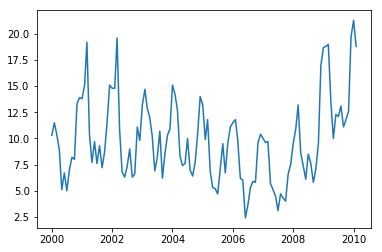

In [0]:
plt.plot(ts)

Do this get_group for 4 trends and plot as subplots

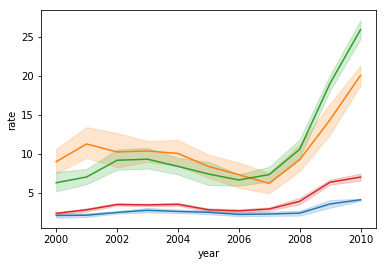

In [0]:
g = un.groupby('series')
g.groups.keys()
list(g.groups) 

g1=g.get_group('Government') 
g2=g.get_group('Agriculture') 
g3=g.get_group('Construction') 
g4=g.get_group('Finance') 

#plt.plot(g2.index, 'rate')
sns.lineplot(data=g1, x='year', y='rate');
sns.lineplot(data=g2, x='year', y='rate');
sns.lineplot(data=g3, x='year', y='rate');
sns.lineplot(data=g4, x='year', y='rate');

This is the timeseries by grouping only the Government data. I can do the same for other sectors.  It’s clear from the plot that there is an overall increase in the trend,with **some seasonality in it**.

**Plotting Rolling Statistics** :The function will plot the moving mean or moving Standard Deviation. This is still visual method



In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()  #rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd =  pd.Series(timeseries).rolling(window=12).std()

#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

#Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

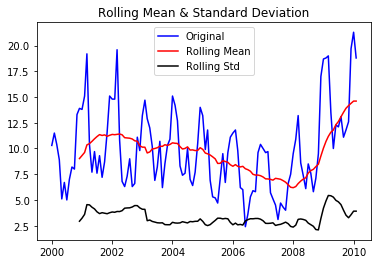

Results of Dickey-Fuller Test:
Test Statistic                  -0.855276
p-value                          0.802344
#Lags Used                      13.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [0]:
test_stationarity(ts)

This timeseries is **not stationary** because :
• mean is increasing even though the std is small. (YES)
• Test stat is > critical value. (YES)
• Note: the signed values are compared and the absolute values 

The basic idea is to** model the trend and seasonality** in this series, so we can *remove it and make the series stationary*. Then we can go ahead and **apply statistical forecasting to the stationary series**. And *finally we can convert the forecasted values into original by applying the trend and seasonality constrains back* to those that we previously separated.

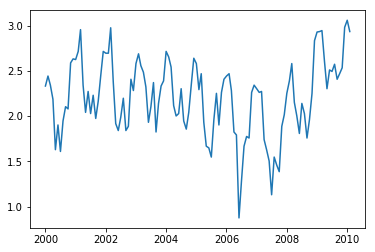

In [0]:
ts_log=np.log(ts)
plt.plot(ts_log)

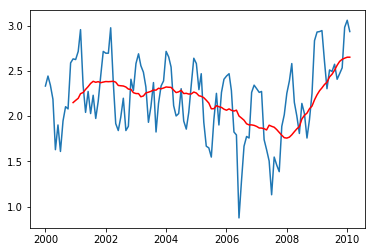

In [0]:
moving_avg=pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [0]:
diff1=ts_log-moving_avg
diff1.head(12)

date
2000-01-01 08:00:00         NaN
2000-02-01 08:00:00         NaN
2000-03-01 08:00:00         NaN
2000-04-01 08:00:00         NaN
2000-05-01 07:00:00         NaN
2000-06-01 07:00:00         NaN
2000-07-01 07:00:00         NaN
2000-08-01 07:00:00         NaN
2000-09-01 07:00:00         NaN
2000-10-01 07:00:00         NaN
2000-11-01 08:00:00         NaN
2000-12-01 08:00:00    0.482533
Name: rate, dtype: float64

In [0]:
diff1.dropna(inplace=True)
diff1.head()

date
2000-12-01 08:00:00    0.482533
2001-01-01 08:00:00    0.450935
2001-02-01 08:00:00    0.518266
2001-03-01 08:00:00    0.707389
2001-04-01 08:00:00    0.081305
Name: rate, dtype: float64

The reason there are null values is because we take the average of first 12 so 11 values are null. We can also see that in the visual representation. Thus it is dropped for further analysis.

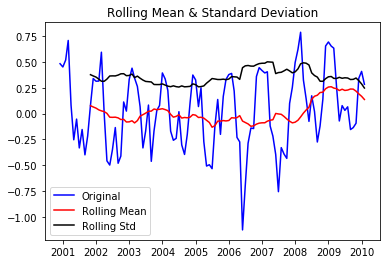

Results of Dickey-Fuller Test:
Test Statistic                 -1.082506
p-value                         0.721998
#Lags Used                     11.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [0]:
test_stationarity(diff1)

The test statistics is still larger than the 10 % critical values. That tells us that we are less than 90% confident that this series is stationary.

In [0]:
expw_avg=pd.Series(ts_log).ewmm(halflife=12)
#moving_avg=pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(expw_avg,color='red')